# Machine Learning (SVM & Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz


#### Import dataset

In [2]:
ngs_reads = pd.read_json('exported_datasets/all_full_features.json')

In [3]:
ngs_reads.reset_index(drop=True, inplace=True)

In [4]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_6_n_content', 'total_sequences', 'percent_gc',
       'min_sequence_length', 'max_sequence_length', 'module_1_status',
       'module_2_status', 'module_3_status', 'module_4_status',
       'module_5_status', 'module_6_status', 'module_7_status',
       'module_8_status', 'module_9_status', 'module_10_status', 'module_1_a0',
       'module_1_a1', 'module_1_a2', 'module_1_a3', 'module_2_std_neg',
       'module_2_std_pos', 'module_3_alpha', 'module_3_beta',
       'module_4_diff_mean', 'module_4_diff_std', 'module_7_alpha',
       'module_7_beta', 'module_8_alpha', 'module_8_beta'],
      dtype='object')

In [5]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_6_n_content', 'total_sequences', 'percent_gc',
       'min_sequence_length', 'max_sequence_length', 'module_1_status',
       'module_2_status', 'module_3_status', 'module_4_status',
       'module_5_status', 'module_6_status', 'module_7_status',
       'module_8_status', 'module_9_status', 'module_10_status', 'module_1_a0',
       'module_1_a1', 'module_1_a2', 'module_1_a3', 'module_2_std_neg',
       'module_2_std_pos', 'module_3_alpha', 'module_3_beta',
       'module_4_diff_mean', 'module_4_diff_std', 'module_7_alpha',
       'module_7_beta', 'module_8_alpha', 'module_8_beta'],
      dtype='object')

#### extract target variable

In [6]:
target = ngs_reads.evaluation.values
ngs_reads.drop(columns='evaluation', inplace=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

#### remove unused columns from dataset

In [7]:
ngs_reads.drop(columns=['organism', 'technology', 'read_number'], inplace=True)
ngs_reads

,module_6_n_content,total_sequences,percent_gc,min_sequence_length,max_sequence_length,module_1_status,module_2_status,module_3_status,module_4_status,module_5_status,...,module_2_std_neg,module_2_std_pos,module_3_alpha,module_3_beta,module_4_diff_mean,module_4_diff_std,module_7_alpha,module_7_beta,module_8_alpha,module_8_beta
0,0.000191,511669,34,35,301,0,2,2,0,2,...,0.152436,0.110886,166.495429,5.099693,0.024625,0.068540,170.582444,1.033088,0.126128,6.786162
1,0.000584,220494,34,35,301,2,1,2,0,2,...,0.638471,0.489727,165.938485,5.605282,0.023490,0.066026,170.611964,1.011972,0.206852,11.074234
2,0.000187,6015314,65,35,301,0,1,2,0,1,...,0.588583,0.274379,33.631888,2.069546,0.031007,0.068681,170.583420,1.003109,0.049906,1.944473
3,0.000017,1916272,35,35,301,2,2,2,0,2,...,0.191566,0.094444,166.506391,5.109851,0.025570,0.066240,170.540443,1.021960,-0.807414,0.005944
4,0.000000,334,35,69,301,0,0,2,0,0,...,4.911008,1.864702,0.108615,-0.116077,0.114478,0.071359,170.611536,1.012826,9.004749,162.619610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.000094,1367226,38,35,251,2,2,2,0,2,...,0.051924,0.072236,166.420364,4.940322,0.028492,0.066430,170.461306,1.161733,0.035012,3.259176
180,0.001998,1836688,39,35,251,2,2,2,0,2,...,0.088583,0.075866,166.432328,5.183535,0.025113,0.067765,170.397161,1.134837,0.040512,2.163178
181,0.000084,799870,37,35,251,2,2,2,0,2,...,0.067566,0.062786,166.649269,4.959551,0.029550,0.067901,170.407269,1.203378,-1.156613,0.001990
182,0.002184,1369977,39,35,251,2,2,2,0,2,...,0.075292,0.070757,166.049585,5.179259,0.025674,0.067058,170.497554,1.105446,0.044248,2.964755


#### train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ngs_reads, target, test_size=0.3, random_state=109)

#### Confusion Matrix Heatmap Training Set

In [39]:
pd.set_option('display.max_columns', None)
corr_matrix.drop(columns=['total_sequences', 'percent_gc', 'min_sequence_length',
                         'max_sequence_length', 'module_1_status', 'module_2_status',
                         'module_3_status', 'module_4_status', 'module_5_status',
                         'module_6_status', 'module_7_status', 'module_8_status',
                          'module_9_status', 'module_10_status'])

,module_6_n_content,module_1_a0,module_1_a1,module_1_a2,module_1_a3,module_2_std_neg,module_2_std_pos,module_3_alpha,module_3_beta,module_4_diff_mean,module_4_diff_std,module_7_alpha,module_7_beta,module_8_alpha,module_8_beta,target
module_6_n_content,1.000000,0.154293,-0.576091,0.637304,-0.673095,0.102428,0.293712,-0.005253,0.404640,-0.039495,-0.059983,0.081774,-0.070204,-0.004916,0.018600,-0.168296
total_sequences,-0.080640,-0.053360,0.094585,-0.047061,-0.096927,-0.267776,-0.297850,-0.383878,-0.296355,0.000089,0.283239,-0.383443,0.287924,-0.237069,-0.299617,0.213681
percent_gc,0.268113,-0.121630,0.177639,-0.113826,0.040583,0.212328,0.368843,-0.510421,-0.018635,0.043769,-0.101328,0.207218,-0.230356,0.145733,0.176607,-0.425232
min_sequence_length,-0.047290,0.118449,0.191564,-0.162047,0.153093,-0.039769,-0.072853,0.026083,-0.040413,-0.170512,-0.301405,0.155070,-0.165820,-0.053507,-0.027270,-0.295665
max_sequence_length,0.029456,0.574535,-0.062153,0.015258,0.223588,0.060467,0.218295,-0.167809,-0.172949,-0.358365,-0.887776,0.969109,-0.982840,0.148351,0.181709,-0.344234
module_1_status,-0.260073,-0.207666,0.275911,-0.297453,0.284909,-0.192893,-0.415755,0.335418,-0.049874,0.036970,0.313554,-0.475826,0.481231,-0.261974,-0.268598,0.635404
module_2_status,-0.427565,-0.014377,0.363300,-0.332360,0.298828,-0.640765,-0.691612,0.366052,-0.157393,-0.384259,0.141341,-0.226205,0.209890,-0.434749,-0.500642,0.524482
module_3_status,0.016104,0.369249,-0.037926,0.069829,-0.075319,-0.257727,-0.614498,0.357000,-0.000771,-0.401351,-0.026159,-0.083161,0.075737,-0.675410,-0.666728,0.094466
module_4_status,-0.035389,-0.125685,0.403710,-0.351542,0.256680,0.016096,0.143161,0.045570,-0.036496,-0.168070,-0.103377,0.194009,-0.189079,-0.000065,0.018129,-0.214640
module_5_status,-0.216883,-0.024580,-0.144595,0.126357,-0.140608,-0.359462,-0.476492,0.358737,0.099722,-0.225935,0.212489,-0.346570,0.356722,-0.337091,-0.390806,0.151556


<AxesSubplot:>

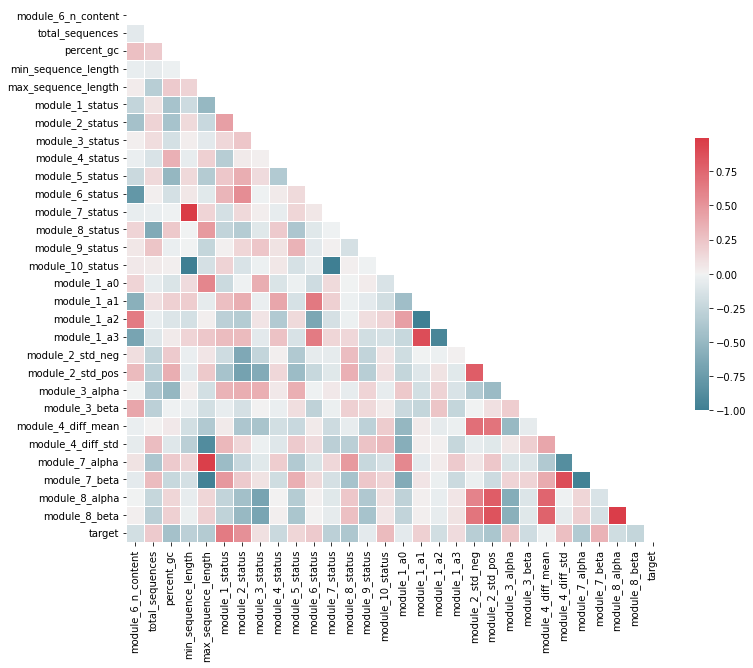

In [9]:
train = X_train.copy()
train.loc[:, 'target'] = y_train.tolist()
train

corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

#### Support Vector Machine Training

In [10]:
clf_svc = svm.SVC(kernel='linear')

In [11]:
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

##### SVM performance

In [12]:
y_pred=clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.6071428571428571
Precision:  0.8125
Recall:  0.6190476190476191
F1 Score:  0.7027027027027026


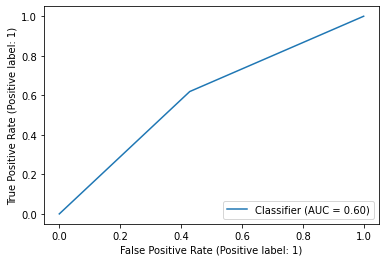

In [13]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### SVM with Cross Validation

In [14]:
clf_svm_cv = svm.SVC(kernel='linear')
scores = cross_validate(clf_svm_cv, ngs_reads, target, cv=10, 
                        scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("Precision: ", scores['test_precision'])
print("Recall: ", scores['test_recall'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("Precision: %0.2f +/- %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Recall: %0.2f +/- %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.73684211 0.63157895 0.63157895 0.78947368 0.61111111 0.66666667
 1.         0.61111111 0.61111111 0.61111111]
Precision:  [0.8        0.61111111 0.61111111 0.73333333 0.61111111 0.64705882
 1.         0.61111111 0.61111111 0.61111111]
Recall:  [0.72727273 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
F1 Scores:  [0.76190476 0.75862069 0.75862069 0.84615385 0.75862069 0.78571429
 1.         0.75862069 0.75862069 0.75862069]
Accuracy: 0.69 +/- 0.12
Precision: 0.68 +/- 0.12
Recall: 0.97 +/- 0.08
F1 Score: 0.79 +/- 0.07


#### Decision Tree

In [15]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [16]:
y_pred = clf_dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9107142857142857
Precision:  1.0
Recall:  0.8809523809523809
F1 Score:  0.9367088607594937


[Text(0.39705882352941174, 0.9166666666666666, 'module_2_std_neg <= 0.113\ngini = 0.498\nsamples = 128\nvalue = [60, 68]\nclass = good'),
 Text(0.11764705882352941, 0.75, 'module_10_status <= 1.0\ngini = 0.131\nsamples = 57\nvalue = [4, 53]\nclass = good'),
 Text(0.058823529411764705, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = ugly'),
 Text(0.17647058823529413, 0.5833333333333334, 'module_8_alpha <= 0.118\ngini = 0.07\nsamples = 55\nvalue = [2, 53]\nclass = good'),
 Text(0.11764705882352941, 0.4166666666666667, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]\nclass = good'),
 Text(0.23529411764705882, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = ugly'),
 Text(0.6764705882352942, 0.75, 'module_2_std_neg <= 0.164\ngini = 0.333\nsamples = 71\nvalue = [56, 15]\nclass = ugly'),
 Text(0.47058823529411764, 0.5833333333333334, 'module_5_status <= 1.5\ngini = 0.499\nsamples = 27\nvalue = [14, 13]\nclass = ugly'),
 Text(0.35294117647058826, 0.416666

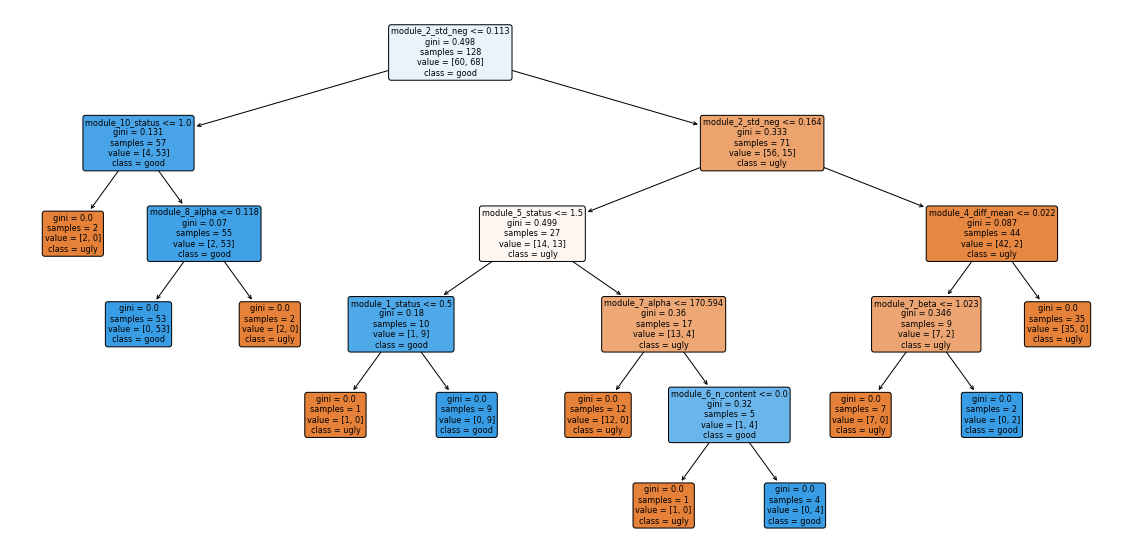

In [17]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_dt, 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

In [18]:
clf_dt_cv = tree.DecisionTreeClassifier()
scores = cross_validate(clf_dt_cv, ngs_reads, target, cv=10, 
                        scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("Precision: ", scores['test_precision'])
print("Recall: ", scores['test_recall'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("Precision: %0.2f +/- %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Recall: %0.2f +/- %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.73684211 0.89473684 0.89473684 1.         0.83333333 0.88888889
 0.88888889 1.         1.         0.77777778]
Precision:  [0.8        0.90909091 0.84615385 1.         0.78571429 1.
 0.84615385 1.         1.         0.73333333]
Recall:  [0.72727273 0.90909091 1.         1.         1.         0.81818182
 1.         1.         1.         1.        ]
F1 Scores:  [0.76190476 0.90909091 0.91666667 1.         0.88       0.9
 0.91666667 1.         1.         0.84615385]
Accuracy: 0.89 +/- 0.09
Precision: 0.89 +/- 0.10
Recall: 0.95 +/- 0.09
F1 Score: 0.91 +/- 0.07


#### Random Forest Training

In [19]:
clf_rf=RandomForestClassifier(n_estimators=100, verbose=True)

In [20]:
clf_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(verbose=True)

##### Random Forest performance

In [21]:
y_pred = clf_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9821428571428571
Precision:  1.0
Recall:  0.9761904761904762
F1 Score:  0.9879518072289156


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


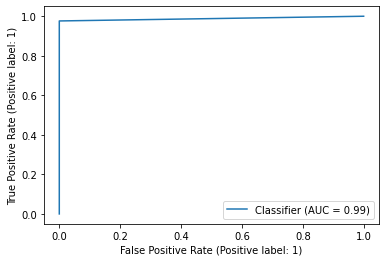

In [22]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### Feature Importance Random Forest

Text(0.5, 0, 'Relative Importance')

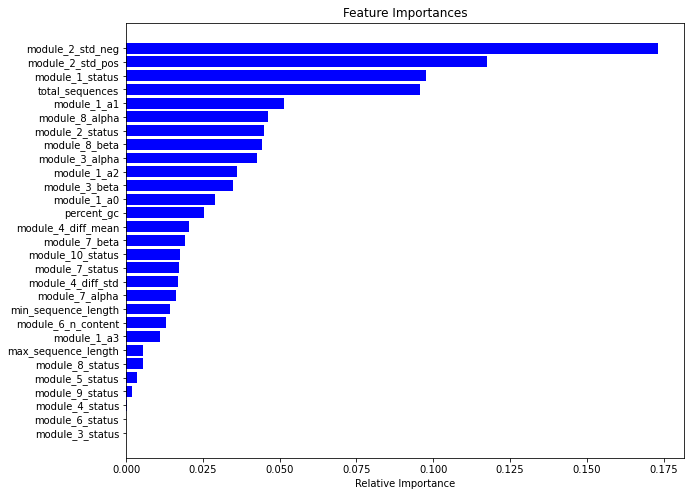

In [32]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')

#### Random Forest with Cross Validation

In [24]:
clf_rf_cv = RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf_rf_cv, ngs_reads, target, cv=10, 
                        scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("Precision: ", scores['test_precision'])
print("Recall: ", scores['test_recall'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("Precision: %0.2f +/- %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Recall: %0.2f +/- %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))



Accuracies:  [0.94736842 0.89473684 0.84210526 1.         1.         0.83333333
 1.         1.         1.         0.77777778]
Precision:  [0.91666667 0.90909091 0.78571429 1.         1.         1.
 1.         1.         1.         0.73333333]
Recall:  [1.         0.90909091 1.         1.         1.         0.72727273
 1.         1.         1.         1.        ]
F1 Scores:  [0.95652174 0.90909091 0.88       1.         1.         0.84210526
 1.         1.         1.         0.84615385]
Accuracy: 0.93 +/- 0.08
Precision: 0.93 +/- 0.09
Recall: 0.96 +/- 0.08
F1 Score: 0.94 +/- 0.06


#### Visualize some trees of the Random Forest

[Text(0.5357142857142857, 0.9166666666666666, 'module_2_std_neg <= 0.127\ngini = 0.5\nsamples = 78\nvalue = [63, 65]\nclass = good'),
 Text(0.2857142857142857, 0.75, 'module_4_diff_mean <= 0.024\ngini = 0.257\nsamples = 40\nvalue = [10, 56]\nclass = good'),
 Text(0.14285714285714285, 0.5833333333333334, 'module_7_alpha <= 170.583\ngini = 0.496\nsamples = 9\nvalue = [6, 5]\nclass = ugly'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]\nclass = ugly'),
 Text(0.21428571428571427, 0.4166666666666667, 'module_3_beta <= 5.04\ngini = 0.408\nsamples = 6\nvalue = [2, 5]\nclass = good'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.2857142857142857, 0.25, 'module_3_beta <= 5.167\ngini = 0.278\nsamples = 5\nvalue = [1, 5]\nclass = good'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [0, 5]\nclass = good'),
 Text(0.35714285714285715, 0.08333333333333333, 'gini = 0.0\

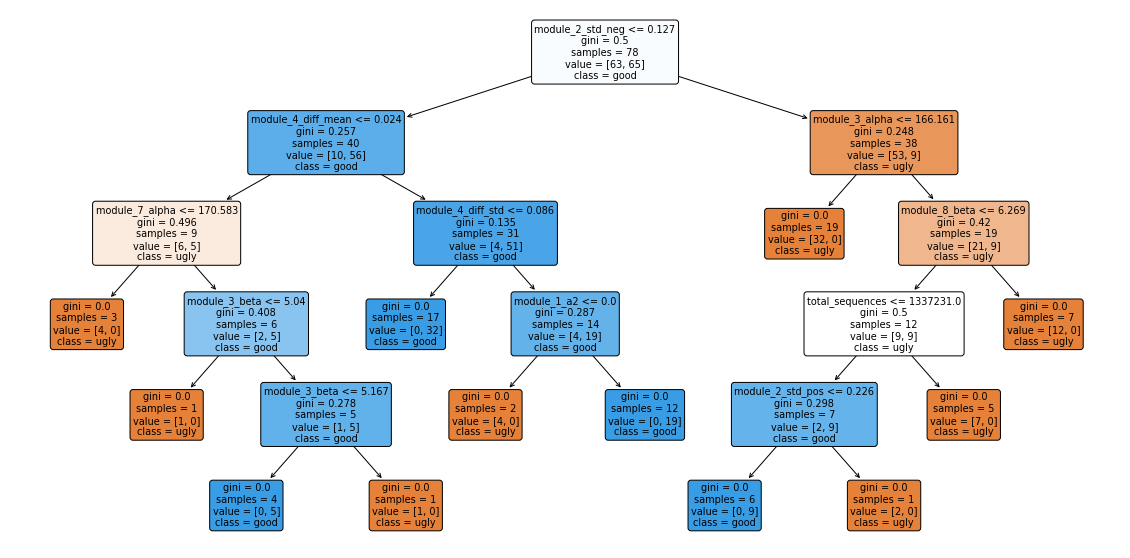

In [25]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[0], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.2222222222222222, 0.9444444444444444, 'module_2_status <= 1.5\ngini = 0.499\nsamples = 82\nvalue = [67, 61]\nclass = ugly'),
 Text(0.1111111111111111, 0.8333333333333334, 'gini = 0.0\nsamples = 17\nvalue = [33, 0]\nclass = ugly'),
 Text(0.3333333333333333, 0.8333333333333334, 'module_1_status <= 0.5\ngini = 0.46\nsamples = 65\nvalue = [34, 61]\nclass = good'),
 Text(0.2222222222222222, 0.7222222222222222, 'gini = 0.0\nsamples = 10\nvalue = [15, 0]\nclass = ugly'),
 Text(0.4444444444444444, 0.7222222222222222, 'module_10_status <= 1.0\ngini = 0.362\nsamples = 55\nvalue = [19, 61]\nclass = good'),
 Text(0.3333333333333333, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = ugly'),
 Text(0.5555555555555556, 0.6111111111111112, 'module_1_a1 <= -0.041\ngini = 0.329\nsamples = 52\nvalue = [16, 61]\nclass = good'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]\nclass = ugly'),
 Text(0.6666666666666666, 0.5, 'module_3_beta <= 8.154\ngini = 0

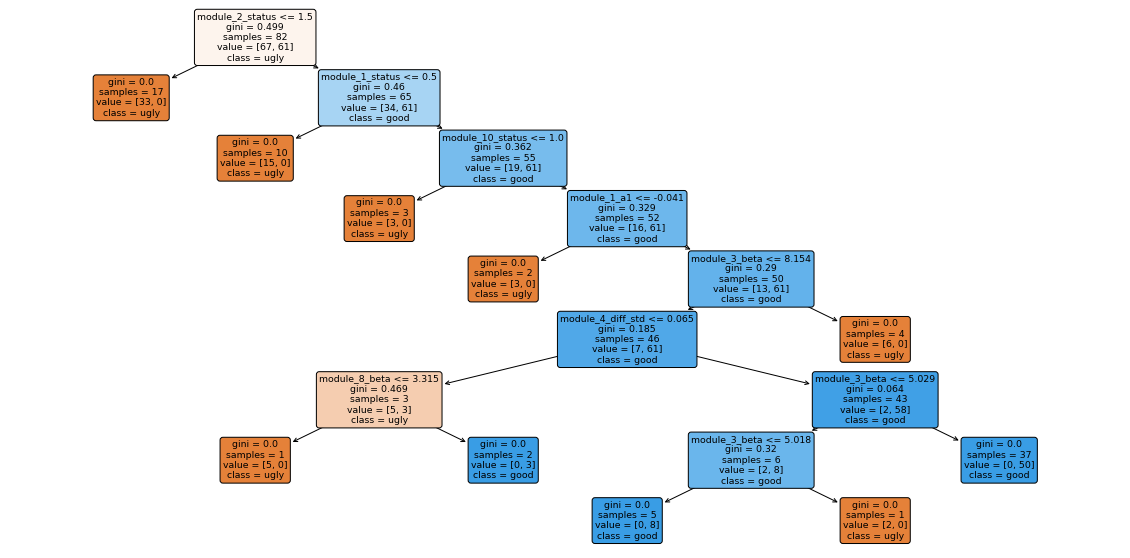

In [26]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[12], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Other Classification Algorithms

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [28]:
y_pred = clf_lg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.6785714285714286
Precision:  0.875
Recall:  0.6666666666666666
F1 Score:  0.7567567567567567


Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB().fit(X_train, y_train)

In [30]:
y_pred = clf_gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9107142857142857
Precision:  0.8936170212765957
Recall:  1.0
F1 Score:  0.9438202247191011


K Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.6071428571428571
Precision:  0.8125
Recall:  0.6190476190476191
F1 Score:  0.7027027027027026
